<a href="https://colab.research.google.com/github/Harbringe/VAP-Data-science/blob/main/Machine_learning_day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NAME:ROHIT BHUPENDRA KULTHE
#DIV:A
#ROLL NO:40
#COLLEGE:KEYSTONE SCHOOL OF ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

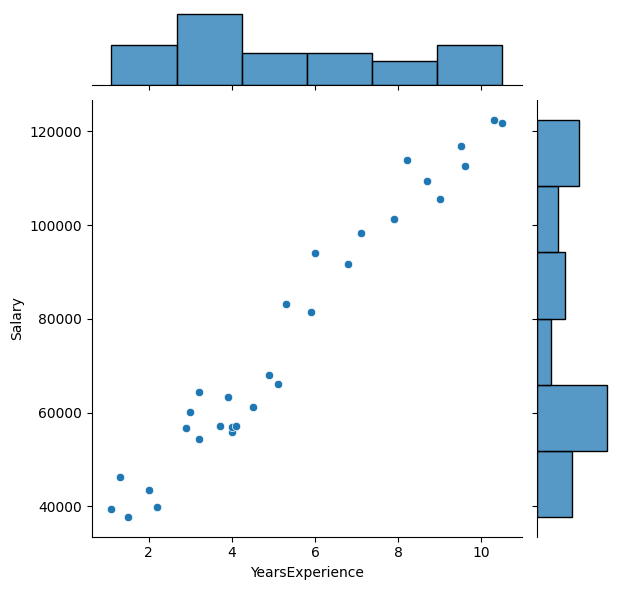

In [7]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.show()

In [11]:
x = df['YearsExperience']
y = df['Salary']

In [16]:
x.ndim

1

In [19]:
x = x.values.reshape(30,1)

In [20]:
x.ndim

2

In [21]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [42]:
x_train.shape

(22, 1)

In [43]:
y_train.shape

(22,)

# Training

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

## Evaluation

In [47]:
y_pred = lr.predict(x_test)
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [49]:
sum(abs(y_test - y_pred)/len(y_pred))

3508.5455930660555

In [52]:
sum((y_test-y_pred)**2)/len(y_pred)

22407940.143340684

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("Mean squared error:", mse)
print("Mean abs error: ", mae)

R2 score: 0.9779208335417602
Mean squared error: 22407940.143340684
Mean abs error:  3508.5455930660555


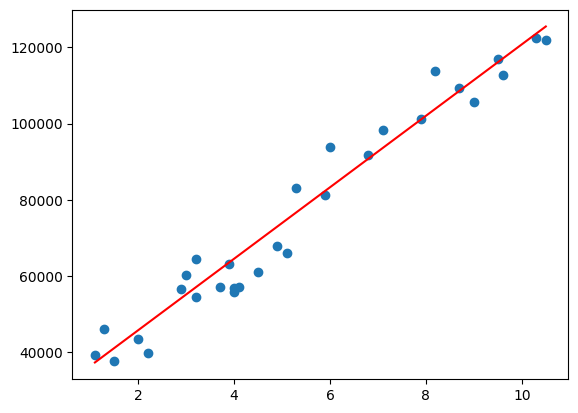

In [53]:
plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='red')
plt.show()

# Decision Tree

In [57]:
df = pd.read_csv('movies.csv')
df

,Movie,Budget,Celebrities,Class
0,The 400 Blows,100000000,2.0,Box Office Burst
1,La Haine,210000000,3.0,Box Office Burst
2,The Godfather,250000000,4.0,Box Office Burst
3,The Godfather: Part II,350000000,2.0,Box Office Burst
4,Man Bites Dog,400600000,4.0,Box Office Burst
5,The Departed,500000000,2.0,Box Office Burst
6,Umberto D.,550000000,5.0,Box Office Burst
7,White Heat,610450000,4.0,Box Office Burst
8,Eddie Murphy: Raw,650000000,3.0,Box Office Burst
9,All Quiet on the Western Front,1000000000,5.0,Box Office Burst


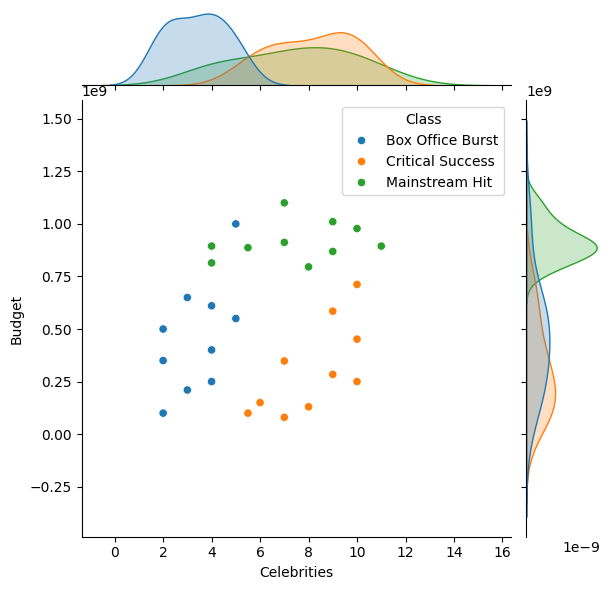

In [60]:
sns.jointplot(x = 'Celebrities', y = 'Budget', data = df, hue='Class')
plt.show()

In [62]:
x = df[['Budget', 'Celebrities']]
y = df['Class']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.8)

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=100)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

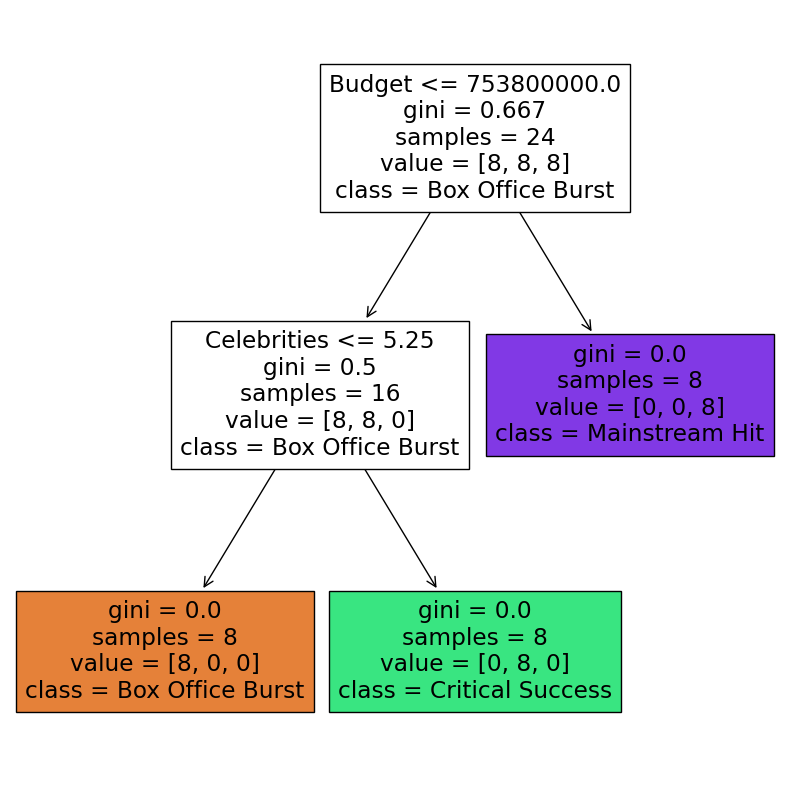

In [79]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(dt, feature_names=df[['Budget', 'Celebrities']].columns, class_names=df['Class'].unique(), filled=True)
plt.show()


In [76]:
y_pred = dt.predict(x_test)
y_pred

array(['Mainstream Hit', 'Critical Success', 'Mainstream Hit',
       'Critical Success', 'Box Office Burst', 'Mainstream Hit'],
      dtype=object)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8333333333333334
Classification Report:
                   precision    recall  f1-score   support

Box Office Burst       1.00      0.50      0.67         2
Critical Success       1.00      1.00      1.00         2
  Mainstream Hit       0.67      1.00      0.80         2

        accuracy                           0.83         6
       macro avg       0.89      0.83      0.82         6
    weighted avg       0.89      0.83      0.82         6



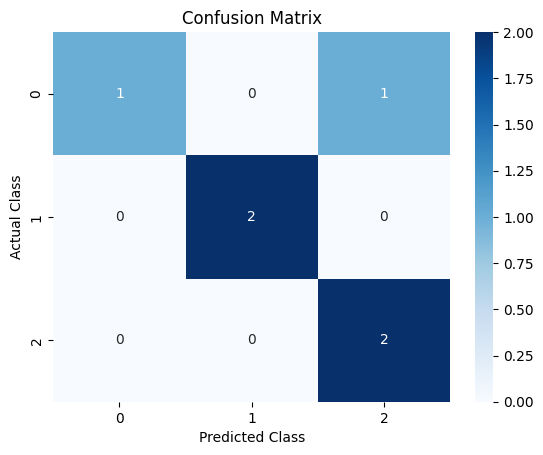

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## New dataset

In [80]:
df = pd.read_csv("banknotes.csv")

In [81]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [82]:
df.shape

(1372, 5)

In [83]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [85]:
x = df.drop("Class", axis = 1)
y = df['Class']

In [86]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [87]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [90]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

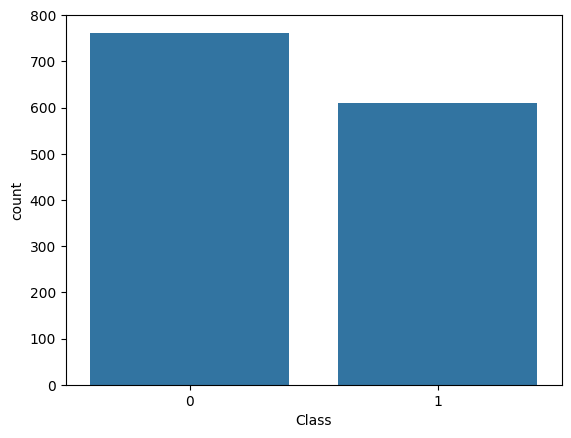

In [91]:
sns.countplot(x=y)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.8)

In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
y_pred = dt.predict(x_test)

[Text(0.4906716417910448, 0.9375, 'Variance <= 0.32\ngini = 0.493\nsamples = 1097\nvalue = [614, 483]\nclass = G'),
 Text(0.3208955223880597, 0.8125, 'Skewness <= 7.764\ngini = 0.3\nsamples = 528\nvalue = [97, 431]\nclass = F'),
 Text(0.22388059701492538, 0.6875, 'Variance <= -0.459\ngini = 0.132\nsamples = 450\nvalue = [32, 418]\nclass = F'),
 Text(0.11940298507462686, 0.5625, 'Curtosis <= 6.219\ngini = 0.061\nsamples = 380\nvalue = [12, 368]\nclass = F'),
 Text(0.05970149253731343, 0.4375, 'Skewness <= 7.225\ngini = 0.008\nsamples = 259\nvalue = [1, 258]\nclass = F'),
 Text(0.029850746268656716, 0.3125, 'gini = 0.0\nsamples = 254\nvalue = [0, 254]\nclass = F'),
 Text(0.08955223880597014, 0.3125, 'Entropy <= -2.185\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = F'),
 Text(0.05970149253731343, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = F'),
 Text(0.11940298507462686, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = G'),
 Text(0.1791044776119403, 0.4375, 'Ske

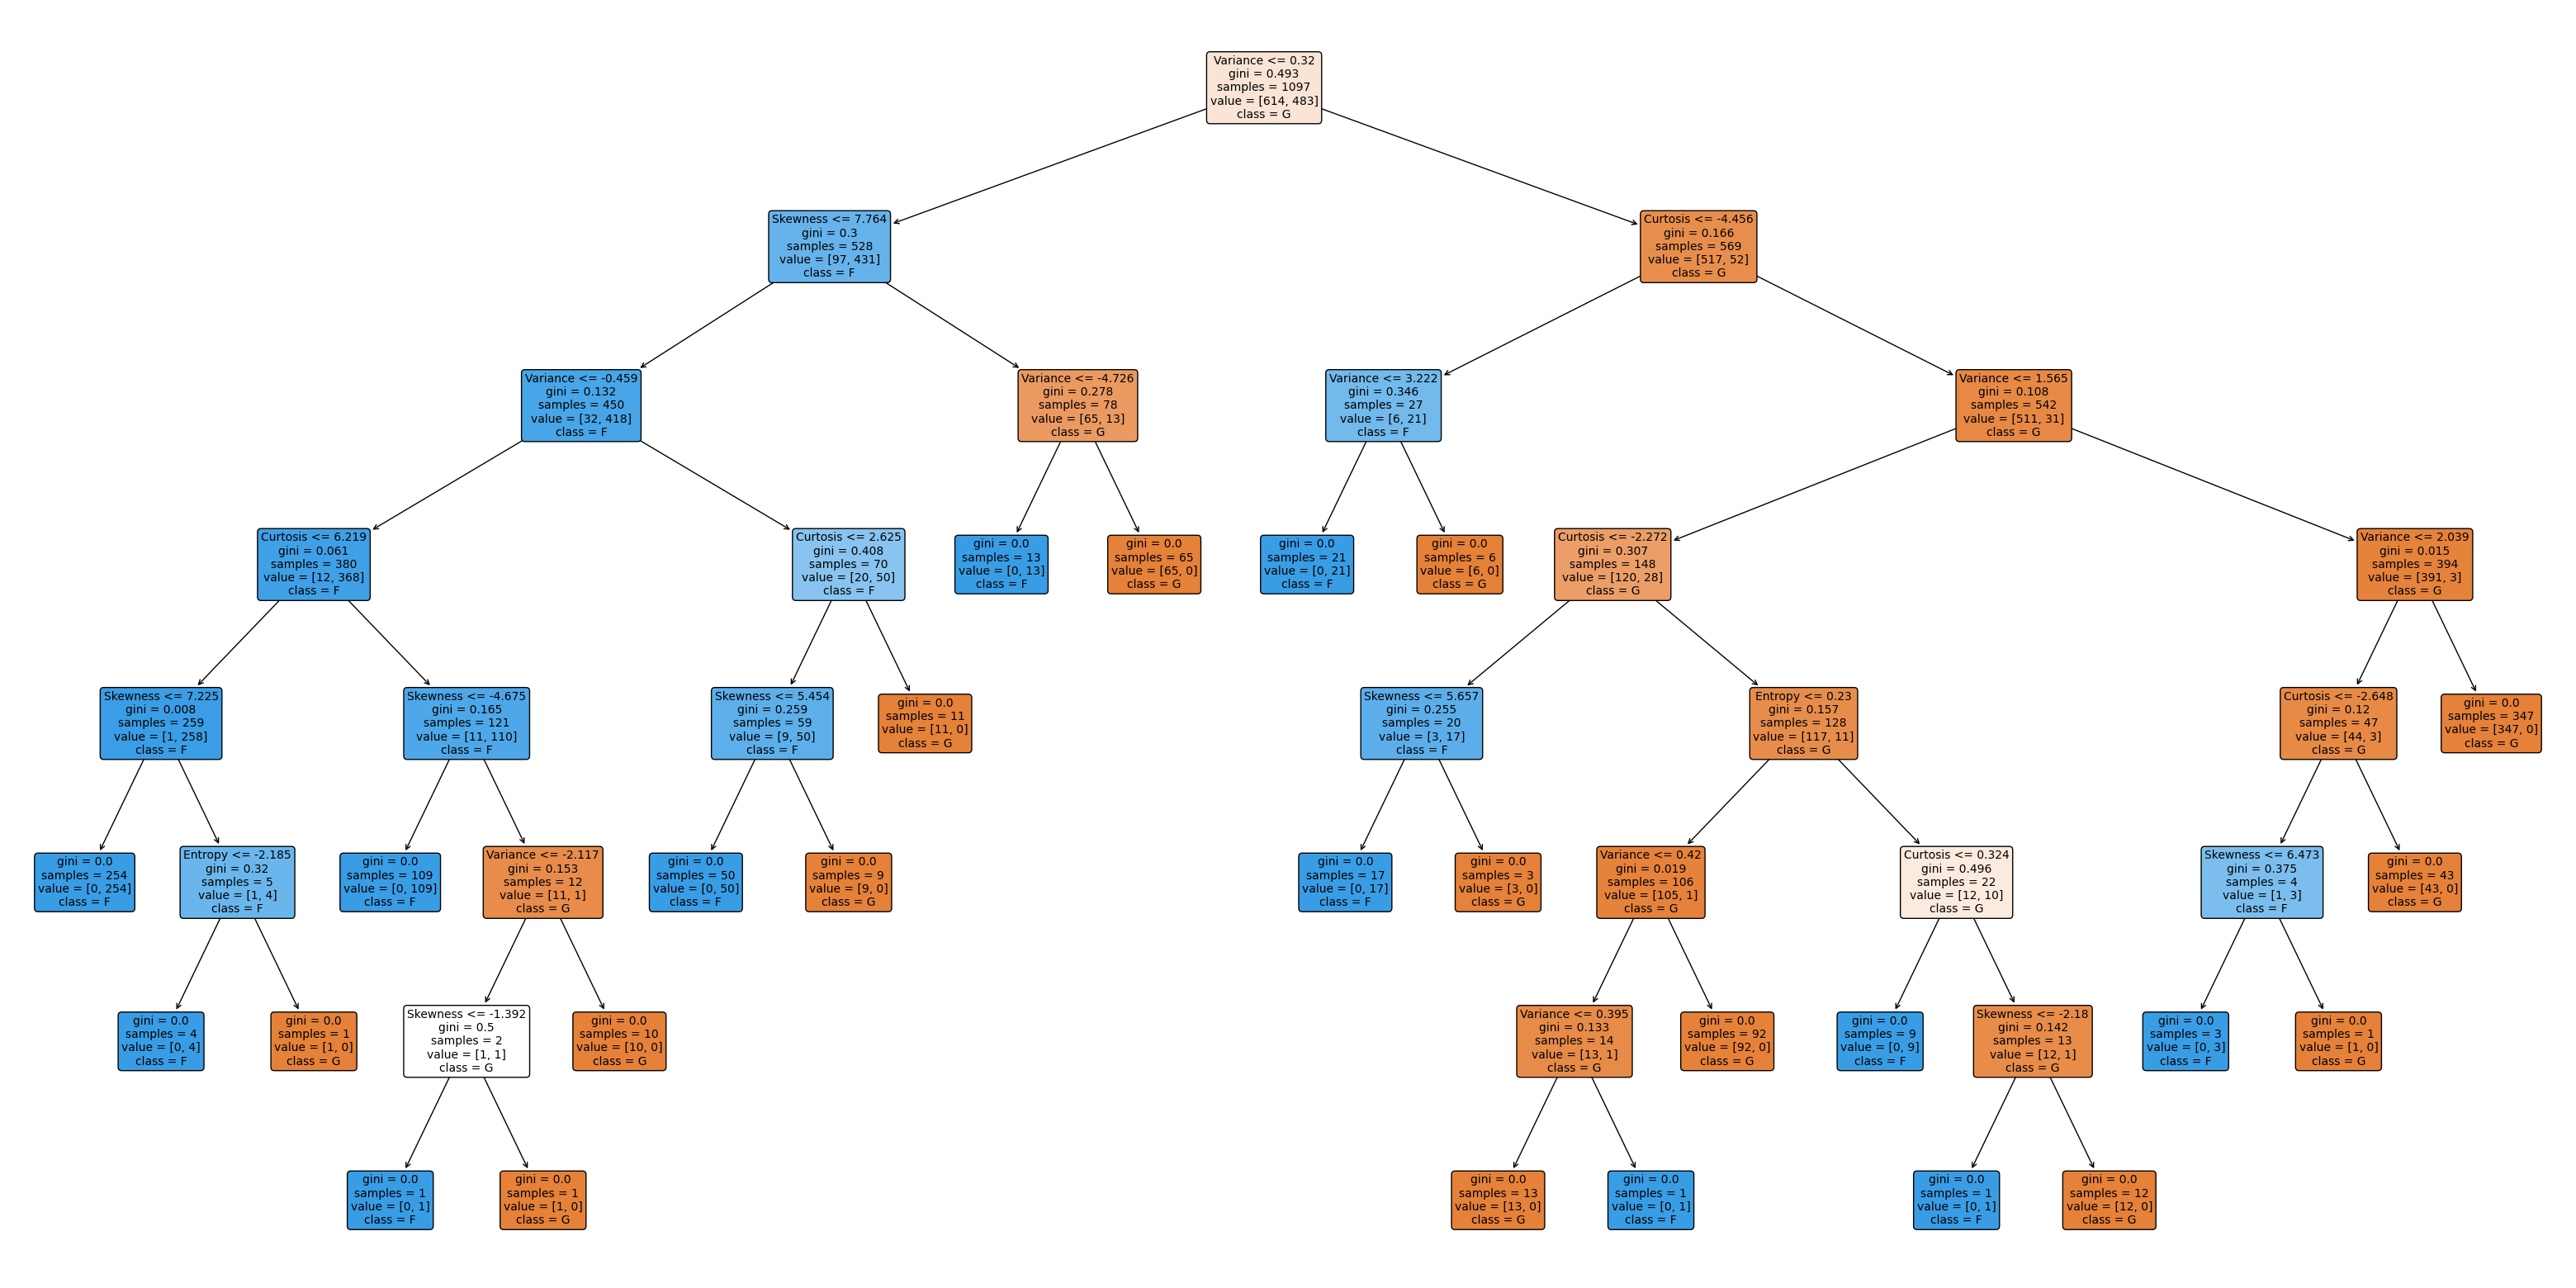

In [103]:
plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, rounded = True, class_names = ["G", "F"], feature_names = x.columns, fontsize = 10)

Accuracy: 0.9781818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



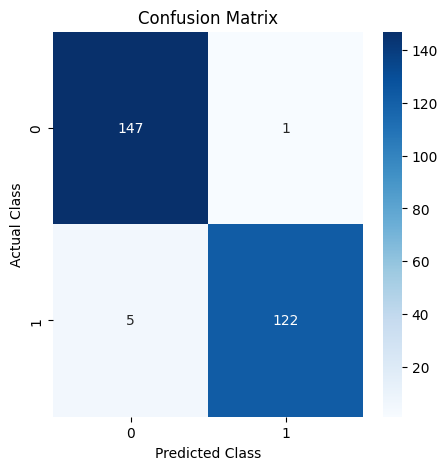

In [105]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [107]:
importance = dt.feature_importances_
importance

array([0.62274384, 0.22287495, 0.13806993, 0.01631128])

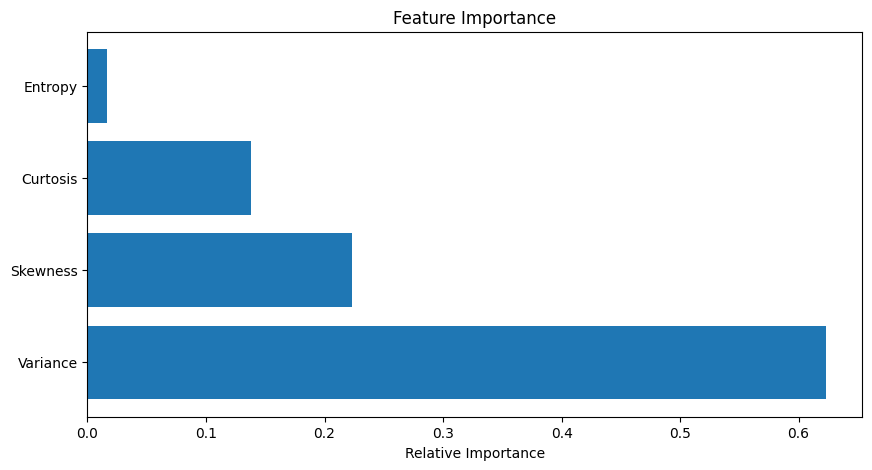

In [114]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importance')
plt.barh(x.columns, importance)
plt.xlabel('Relative Importance')
plt.show()

## Clustering

In [123]:
df = pd.read_csv('Mall_Customers (1).csv')

In [124]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [125]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [126]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


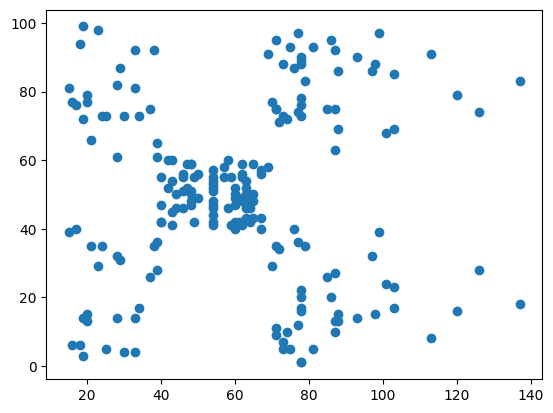

In [127]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [147]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 100, random_state = 0)
labels = km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [148]:
labels

array([14, 11, 15, 11, 14, 11, 15, 69, 15, 79, 39, 16, 39, 84, 39, 84, 70,
       25, 74, 16, 70, 52, 37, 52, 98, 34, 19, 58, 19, 75, 53, 52, 53, 90,
        5, 86,  5,  3, 56,  3, 33, 30, 33, 29, 56, 77, 64, 47,  1,  1, 93,
       29, 64, 29, 47,  1, 93, 47, 12, 47, 83, 83, 12, 48, 12, 48, 76, 76,
       48, 76, 96, 92, 76, 96, 43, 99, 68, 43, 68, 28, 68, 99, 28, 28, 99,
       43,  4, 67,  4, 38, 67, 62, 38, 62, 62, 61, 38, 38, 62, 38, 62, 87,
       97, 61, 61, 62, 21, 87, 10, 87, 21, 61, 10, 87, 21, 21, 10, 97, 10,
       35, 35, 10, 35, 72, 81, 50, 24,  9, 94, 50, 94, 50, 24, 20, 45, 91,
       45, 20, 94, 20, 45,  9, 55, 59, 17,  9, 71, 54, 78, 59, 40, 59, 78,
       88, 40, 59,  8, 88,  8, 54, 71, 44, 82, 95,  2,  0, 66, 41,  2, 49,
       51,  0, 51, 41, 51, 13, 51, 57, 22, 85, 65, 31, 80, 31, 32, 23, 18,
       27, 89, 73, 18, 27, 26, 42, 63, 60, 36,  6,  7, 46], dtype=int32)

In [149]:
km.inertia_

347.5333333333333

## Find ideal num of clusters

In [165]:
import warnings
warnings.filterwarnings("ignore")

sse = []

for i in range(1, 20):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)



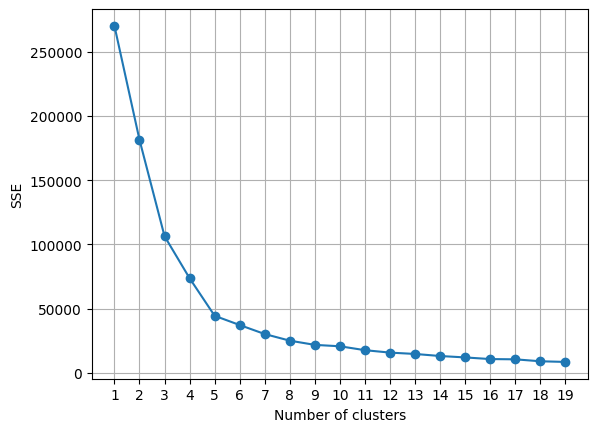

In [166]:
plt.plot(range(1,20), sse, marker = 'o')
plt.xticks(range(1, 20))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()